In [1]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00


In [2]:
from os import posix_spawn
, unsqueeze
from pennylane.math.utils import requires_grad
import matplotlib.pyplot as plt
import pennylane as qml 
import torch
from torch.autograd import Variable
from pennylane import numpy as np

# Create device

dev = qml.device('default.qubit', wires=2)

# Create decorator

@qml.qnode(dev, interface= 'torch') 

# Create quantum circuit, (phi, theta, psi, alpha) our weight
# (params) our random parameters
def circuit(phi, theta, psi, alpha, params):

    qml.RX(theta, wires=0)
    qml.RX(psi, wires=1)
    qml.RY(phi, wires=0)
    qml.RY(alpha, wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(torch.tensor(params[0]), wires=0)
    qml.RY(torch.tensor(params[1]), wires=1)
    qml.RX(torch.tensor(params[2]), wires=0)
    qml.RX(torch.tensor(params[3]), wires=1)
    return qml.density_matrix([1])

# Calculate second Renyi entanglement entropy using our weights and random parameters

def calculate_entropy(phi, theta, psi, alpha, params):
  density_matrix=(circuit (phi, theta, psi, alpha, params))
  entropy=-torch.log2(torch.trace(density_matrix**2))
  return entropy

# Calculate cost function using entanglement entropy and target value of entanglement entropy
def cost(entropy, target):
  return torch.abs(entropy-target)**2

# Establish our weights

phi = Variable(torch.tensor(1.), requires_grad=True)
theta = Variable(torch. tensor (0.05), requires_grad=True)
psi = Variable(torch.tensor(np.pi), requires_grad=True)
alpha = Variable(torch.tensor(1.), requires_grad=True)

# Create targer value
target=torch.tensor(0.2)

# Create a random seed
seed = 12

loss_count=[]

# Create optimizer
opt = torch.optim.Adam([phi, theta, psi, alpha], lr = 0.1)
 
# Create loss calculating loop

for i in range (100):
  
  # Every iteration create new random seed for random parameters
  np.random.seed(seed+i)
  params = np.random.rand(4)
  opt.zero_grad()
  entropy=calculate_entropy(phi, theta, psi, alpha, params)
  loss = cost (entropy, target)
  loss.backward()
  opt.step()

  if i%20==0:
    print("Loss=", loss)
  loss_count.append(loss.detach().numpy())

# Display density matrix for target entropy value
print(circuit(phi, theta, psi, alpha, params))

# Display possible entanglement entropy for circuit
print(f"Possible entropy {entropy}")

Loss= tensor(0.4531, dtype=torch.float64, grad_fn=<PowBackward0>)
Loss= tensor(0.5498, dtype=torch.float64, grad_fn=<PowBackward0>)
Loss= tensor(0.6390, dtype=torch.float64, grad_fn=<PowBackward0>)
Loss= tensor(0.0429, dtype=torch.float64, grad_fn=<PowBackward0>)
Loss= tensor(0.0058, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([[ 0.9250+0.0000j, -0.1124+0.1328j],
        [-0.1124-0.1328j,  0.0750+0.0000j]], dtype=torch.complex128,
       grad_fn=<SqueezeBackward0>)
Possible entropy (0.22206437181734942-0j)


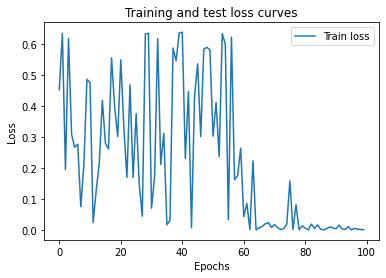

In [3]:
plt.plot(range(100),loss_count, label="Train loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();